In [2]:
import pandas as pd
from neuroguard.utils.visualisations import plot_tsne
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def plot_mean_line(df, x_col, y_col, title=None):
    """
    Rysuje wykres liniowy średnich wartości y_col względem x_col.

    Args:
        df (pd.DataFrame): DataFrame z danymi
        x_col (str): nazwa kolumny dla osi X
        y_col (str): nazwa kolumny dla osi Y
        title (str, optional): tytuł wykresu
    """

    grouped = df.groupby(x_col)[y_col].mean().reset_index()
    grouped = grouped.sort_values(by=x_col)

    plt.figure(figsize=(8, 5))
    plt.plot(grouped[x_col], grouped[y_col], marker='o')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title if title else f'{y_col} względem {x_col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_triplet_loss(df, x_column, y_column='final_loss'):
    """
    Tworzy estetyczny wykres zależności triplet loss od wybranej kolumny.

    Parametry:
    - df: pandas.DataFrame z danymi
    - x_column: str, kolumna na osi X (np. 'lfreq')
    - y_column: str, kolumna triplet loss (domyślnie 'final_loss')
    """
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.rcParams.update({'font.size': 12})

    plt.figure(figsize=(10, 6))
    
    sns.scatterplot(
        x=x_column, 
        y=y_column, 
        data=df, 
        color='royalblue', 
        alpha=0.9, 
        edgecolor='k'
    )

    plt.xlabel(x_column, fontsize=14)
    plt.ylabel('Triplet Loss', fontsize=14)
    plt.title(f'Zależność między {x_column} a Triplet Loss', fontsize=16, weight='bold')

    plt.grid(True, linestyle='--', alpha=0.9)
    plt.tight_layout()
    plt.show()


In [4]:
df = pd.read_json('grid_search_embedding_dim.json')

df_params = df['params'].apply(pd.Series)
df = df.join(df_params)
df.drop('params', axis=1, inplace = True)

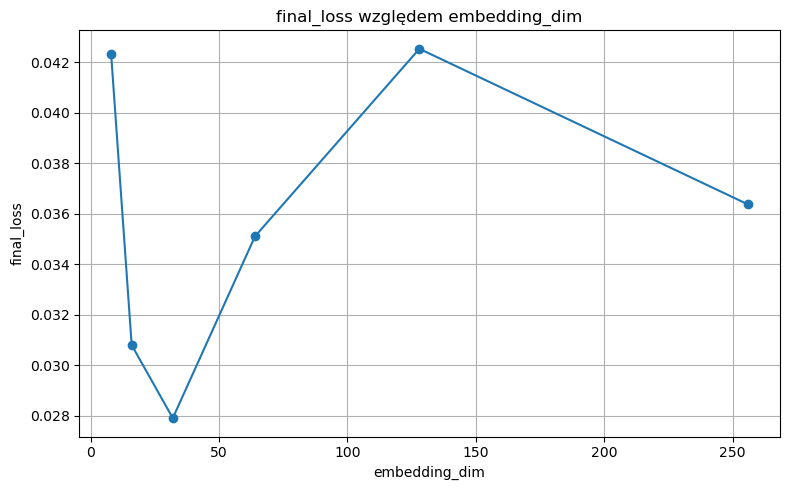

In [6]:
plot_mean_line(df, 'embedding_dim', 'final_loss')

In [7]:
best_embc = df.sort_values(by='final_loss').head(1)['embeddings']
best_labelsc = df.sort_values(by='final_loss').head(1)['labels']
best_labelsc = torch.tensor(best_labelsc.tolist()).squeeze()
best_embc = torch.tensor(best_embc.tolist()).squeeze()

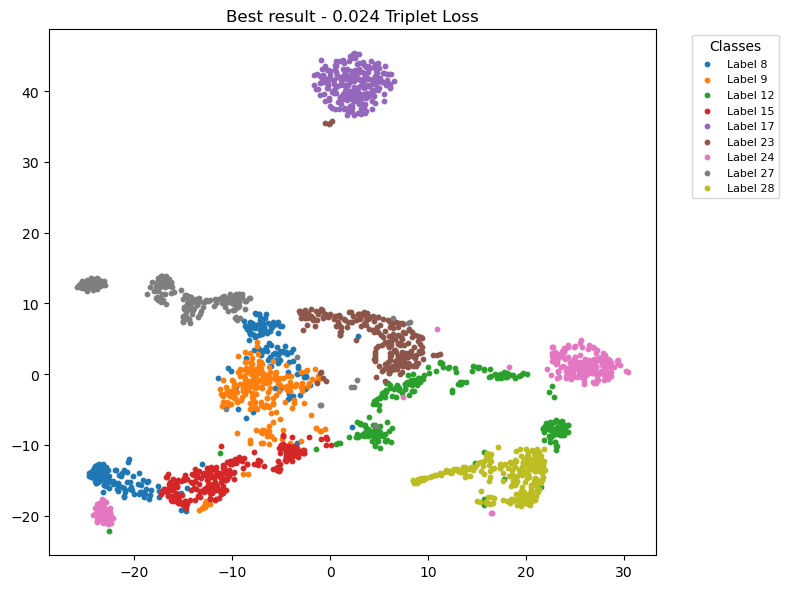

In [8]:
plot_tsne(best_embc, best_labelsc, perplexity = 100, learning_rate = 100, title = "Best result - 0.024 Triplet Loss")

In [9]:
df = pd.read_json('grid_search_n_epochs.json')

df_params = df['params'].apply(pd.Series)
df = df.join(df_params)
df.drop('params', axis=1, inplace = True)

In [11]:
best_embc = df.sort_values(by='final_loss').head(1)['embeddings']
best_labelsc = df.sort_values(by='final_loss').head(1)['labels']
best_labelsc = torch.tensor(best_labelsc.tolist()).squeeze()
best_embc = torch.tensor(best_embc.tolist()).squeeze()

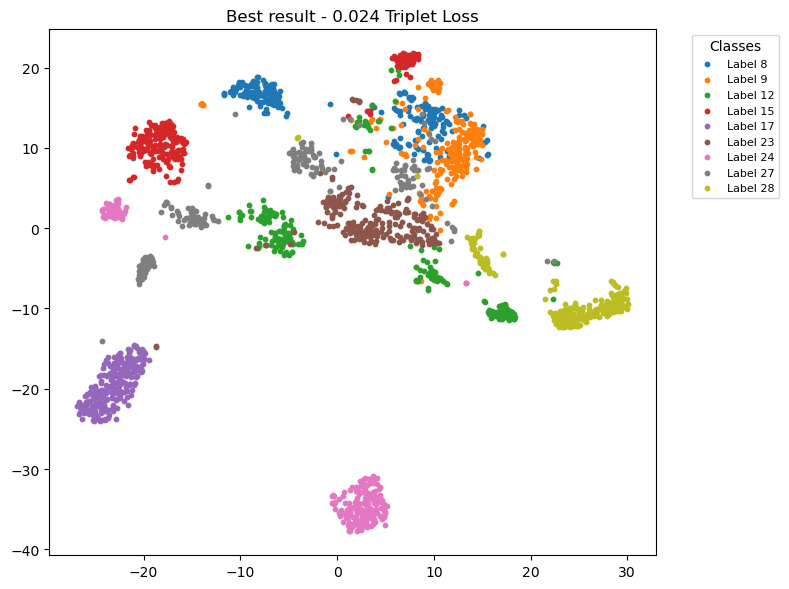

In [12]:
plot_tsne(best_embc, best_labelsc, perplexity = 100, learning_rate = 100, title = "Best result - 0.024 Triplet Loss")